# Lead Scoring using Logistic Regression

## 1 Problem Statement

A company called X Education, which sells online courses, generates a large number of leads for its sales team. The goals of the analytics project are to:
- build a model to assign a lead score to each of the leads (where a higher lead score indicates a more promising lead),
- identify the most promising leads, called 'Hot Leads', for the sales team, and
- develop solutions to some problems presented by the company.

The model will be used to provide more qualified leads to the sales team and improve the lead conversion rate.

## 2 Approach to Analysis

Analysis is done in the following steps:
- Data Understanding, Cleaning & Visualisation
- Data Preparation
- Model Building
- Model Evaluation
- Model Interpretation

## 3 Data Understanding, Cleaning & Visualisation

### 3.1 Data Loading & Inspection

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspecting shape of the data
df.shape

(9240, 37)

In [4]:
# Checking data types and other meta-data
df.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 3.2 Data Cleaning

#### 3.2.1 Checking and fixing header and footer rows

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


No changes are required because there are no anomalies in the header and footer rows.

#### 3.2.2 Checking and fixing missing values

In [7]:
# Calculating the percentage of null values
null_per = df.isnull().sum()/len(df)*100
null_per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# Dropping columns with null values greater than 45%
df = df.drop(columns=null_per[null_per>45].index)

In [9]:
# Calculating the percentage of null values again
null_per = df.isnull().sum()/len(df)*100
null_per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### 3.2.3 Checking and fixing duplicate rows

In [10]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No changes are required because there are no duplicate rows.

#### 3.2.4 Validating data

In [11]:
# Calculating the conversion rate
df['Converted'].sum()/len(df['Converted'])*100

38.53896103896104

We have a conversion rate of about 38.5%.

In [12]:
# Dropping 'Prospect ID' and 'Lead Number', which are only identifiers
prospect_id = df['Prospect ID']
df = df.drop(columns=['Prospect ID','Lead Number'])

In [13]:
# Printing descriptive statistics of numerical variables to identify anomalies
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


Descriptive statistics do not show any anomalies.

In [14]:
# Creating a list of categorical variables
cat_vars = list(df.columns[np.isin(df.columns,df.describe().columns,invert=True)])
cat_vars.append('Converted')
cat_vars

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Converted']

In [15]:
# Printing unique values of categorical variables to identify anomalies
for x in cat_vars:
    print(df[x].value_counts(normalize=True,dropna=False)*100,end='\n\n')

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: fl

In [16]:
# Imputing 'NaN' for the value 'Select' because it corresponds to the situation where a value is not selected (null value)
df = df.replace('Select',np.NaN)

In [17]:
# Calculating the percentage of missing values after the above imputation
null_per = df.isnull().sum()/len(df)*100
null_per.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.0000

In [18]:
# Dropping columns with more than 45% missing values
df = df.drop(columns=null_per[null_per>45].index)

In [19]:
# Dropping columns with very low variability (columns in which a single value occurs in more than 99% of observations) because they do not provide any information for the logistic regression model
df = df.drop(columns=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'])
df.shape

(9240, 16)

In [20]:
# Imputing the value 'Unknown' to missing values in columns with a large number of missing values (greater than 20%)
cols = df.columns[df.isnull().sum()/len(df)>0.2]
df[cols] = df[cols].fillna('Unknown')
for x in cols:
    print(df[x].value_counts(),end='\n\n')

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [21]:
# Imputing the median to missing values in the columns 'TotalVisits' and 'Page Views Per Visit', which have less than 3% missing values
for x in ['TotalVisits','Page Views Per Visit']:
    m = df[x].median()
    df[x] = df[x].fillna(m)

In [22]:
# Imputing the mode to missing values in the columns 'Last Activity' and 'Lead Source', which have less than 3% missing values
for x in ['Last Activity','Lead Source']:
    m = df[x].mode()[0]
    df[x] = df[x].fillna(m)

In [23]:
# Calculating the percentage of missing values after the above imputation
null_per = df.isnull().sum()/len(df)*100
null_per.sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [24]:
# Printing all series in the DataFrame after sorting to identify invalid data
for x in df.columns:
    print(df[x].sort_values(),end='\n\n')

0                  API
4800               API
4799               API
4796               API
4795               API
             ...      
1124       Lead Import
601        Lead Import
1145       Lead Import
597        Lead Import
2601    Quick Add Form
Name: Lead Origin, Length: 9240, dtype: object

4218          Click2call
4561          Click2call
4230          Click2call
1867          Click2call
8156      Direct Traffic
              ...       
237               google
2588              google
5241             testone
2876    welearnblog_Home
3626      youtubechannel
Name: Lead Source, Length: 9240, dtype: object

0        No
5987     No
5986     No
5985     No
5984     No
       ... 
5112    Yes
774     Yes
8377    Yes
5130    Yes
6612    Yes
Name: Do Not Email, Length: 9240, dtype: object

0       0
7549    0
7550    0
4231    0
7551    0
       ..
4360    1
4359    1
4358    1
4397    1
9239    1
Name: Converted, Length: 9240, dtype: int64

0         0.0
4319      0.0
4321      0.

In [25]:
# Making minor adjustments to case and labels
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Country'] = df['Country'].replace('unknown','Unknown')
df['City'] = df['City'].replace('Other Cities','Other')

#### 3.2.5 Checking and adjusting data types and other meta-data

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

#### 3.2.6 Grouping levels in relevant categorical variables

- Lead Origin
- Lead Source
- Country
- Specialization
- What is your current occupation
- What matters most to you in choosing a course
- City
- Last Activity
- Tags
- Last Notable Activity

In [27]:
cols = ['Lead Origin','Lead Source','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','City','Last Activity','Tags','Last Notable Activity']
for x in cols:
    l = list(df[x].value_counts().index[df[x].value_counts(normalize=True)*100<5])
    df[x] = df[x].replace(l,'Other')

In [28]:
# Checking categorical variables to see levels
for x in df.columns.difference(df.describe().columns):
    print(df[x].value_counts(normalize=True)*100,end='\n\n')

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

Unknown              39.707792
Mumbai               34.870130
Other                17.283550
Thane & Outskirts     8.138528
Name: City, dtype: float64

India      70.259740
Unknown    26.688312
Other       3.051948
Name: Country, dtype: float64

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

Email Opened               38.311688
SMS Sent                   29.707792
Other                      14.523810
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: Last Notable Activity, dtype: float64

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Other                       0.606061
Name: Lead Origin, dtype: float64

Google            31.482684
Direct

#### 3.2.7 Dropping some variables based on business logic

In [29]:
pd.crosstab(df['Last Activity'],df['Last Notable Activity'])

Last Notable Activity,Email Opened,Modified,Other,SMS Sent
Last Activity,,,,
Email Opened,2827,713,0,0
Olark Chat Conversation,0,790,183,0
Other,0,1009,333,0
Page Visited on Website,0,322,318,0
SMS Sent,0,573,0,2172


In [30]:
# Dropping 'Tags' because it is not available at the time of lead scoring and 'Last Notable Activity' because it coincides significantly with 'Last Activity'
df = df.drop(columns=['Last Notable Activity','Tags'])
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### 3.2.8 Treating outliers

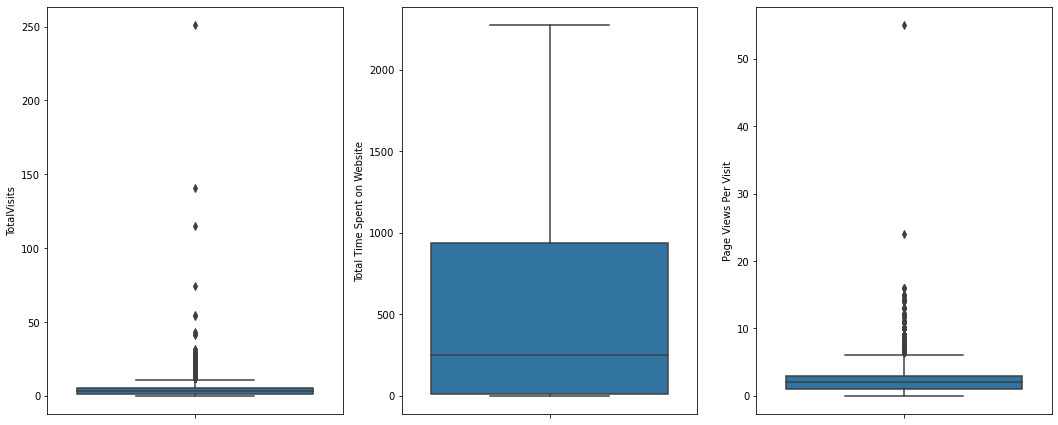

In [31]:
# Creating boxplots of numerical variables to identify outliers
cols = list(df.describe().columns)
cols.remove('Converted')
fig,ax = plt.subplots(1,3,figsize=[18,7.5])
for i,x in enumerate(cols):
    sns.boxplot(y=df[x],ax=ax[i])
fig.show()

In [32]:
# Capping outliers in 'TotalVisits' and 'Page Views Per Visit' between 'Quartile 1 - 1.5*IQR' and 'Quartile 3 + 1.5*IQR'
Q3 = df[cols].quantile(0.75)
Q1 = df[cols].quantile(0.25)
IQR = Q3 - Q1
IQR

TotalVisits                      4.0
Total Time Spent on Website    924.0
Page Views Per Visit             2.0
dtype: float64

In [33]:
for x in cols:
    df[x][df[x]>(Q3[x] + 1.5*IQR[x])] = Q3[x] + 1.5*IQR[x]
    df[x][df[x]<(Q1[x] - 1.5*IQR[x])] = Q1[x] - 1.5*IQR[x]

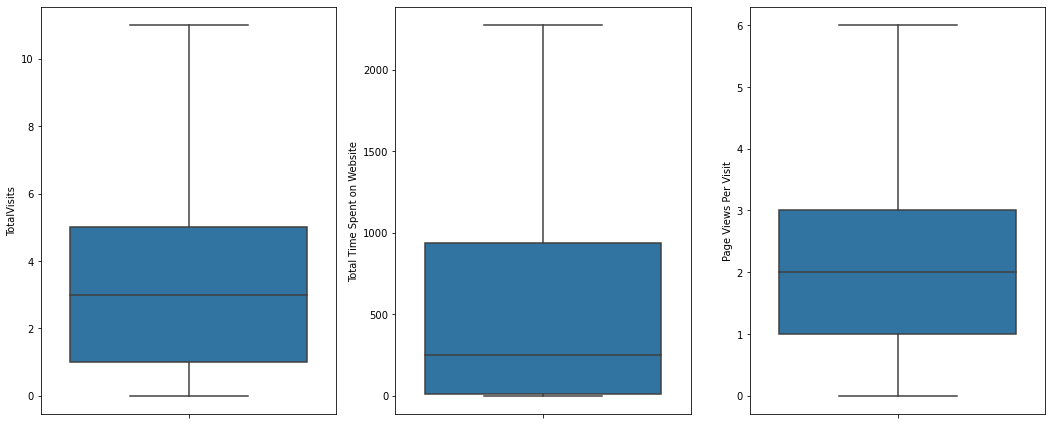

In [34]:
# Creating boxplots again to check the results
fig, ax = plt.subplots(1,3,figsize=[18,7.5])
for i,x in enumerate(cols):
    sns.boxplot(y=df[x],ax=ax[i])
fig.show()

**Thus, data cleaning and outlier treatment are complete and 100% of the rows are retained.**

### 3.3 Data Visualisation

#### 3.3.1 Univariate analysis of numerical variables

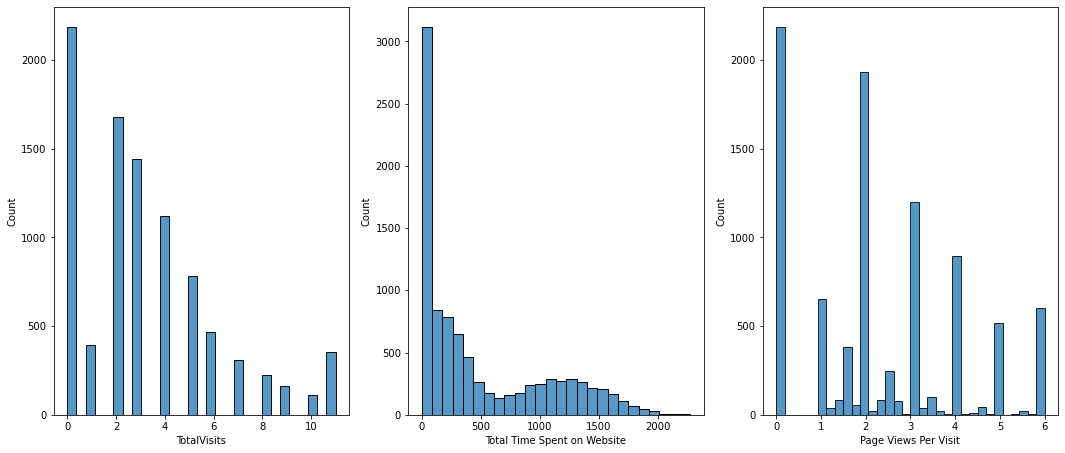

In [35]:
# Creating histograms of numerical variables
num_vars = cols
fig, ax = plt.subplots(1,3,figsize=[18,7.5])
for i,x in enumerate(num_vars):
    sns.histplot(df[x],ax=ax[i])
fig.show()

**Insights**
1. The histogram of 'TotalVisits' shows that the majority of people make few website visits and only a few people make many.

2. The histogram of 'Total Time Spent on Website' shows that the majority of people spend less time on the website and only a few spend a lot of time.
3. The histogram of 'Page Views Per Visit' shows that the majority of people visit only a few pages and only a few visit many pages. The spikes at integer values are expected because the number of page views must be whole numbers. 

#### 3.3.2 Univariate analysis of categorical variables

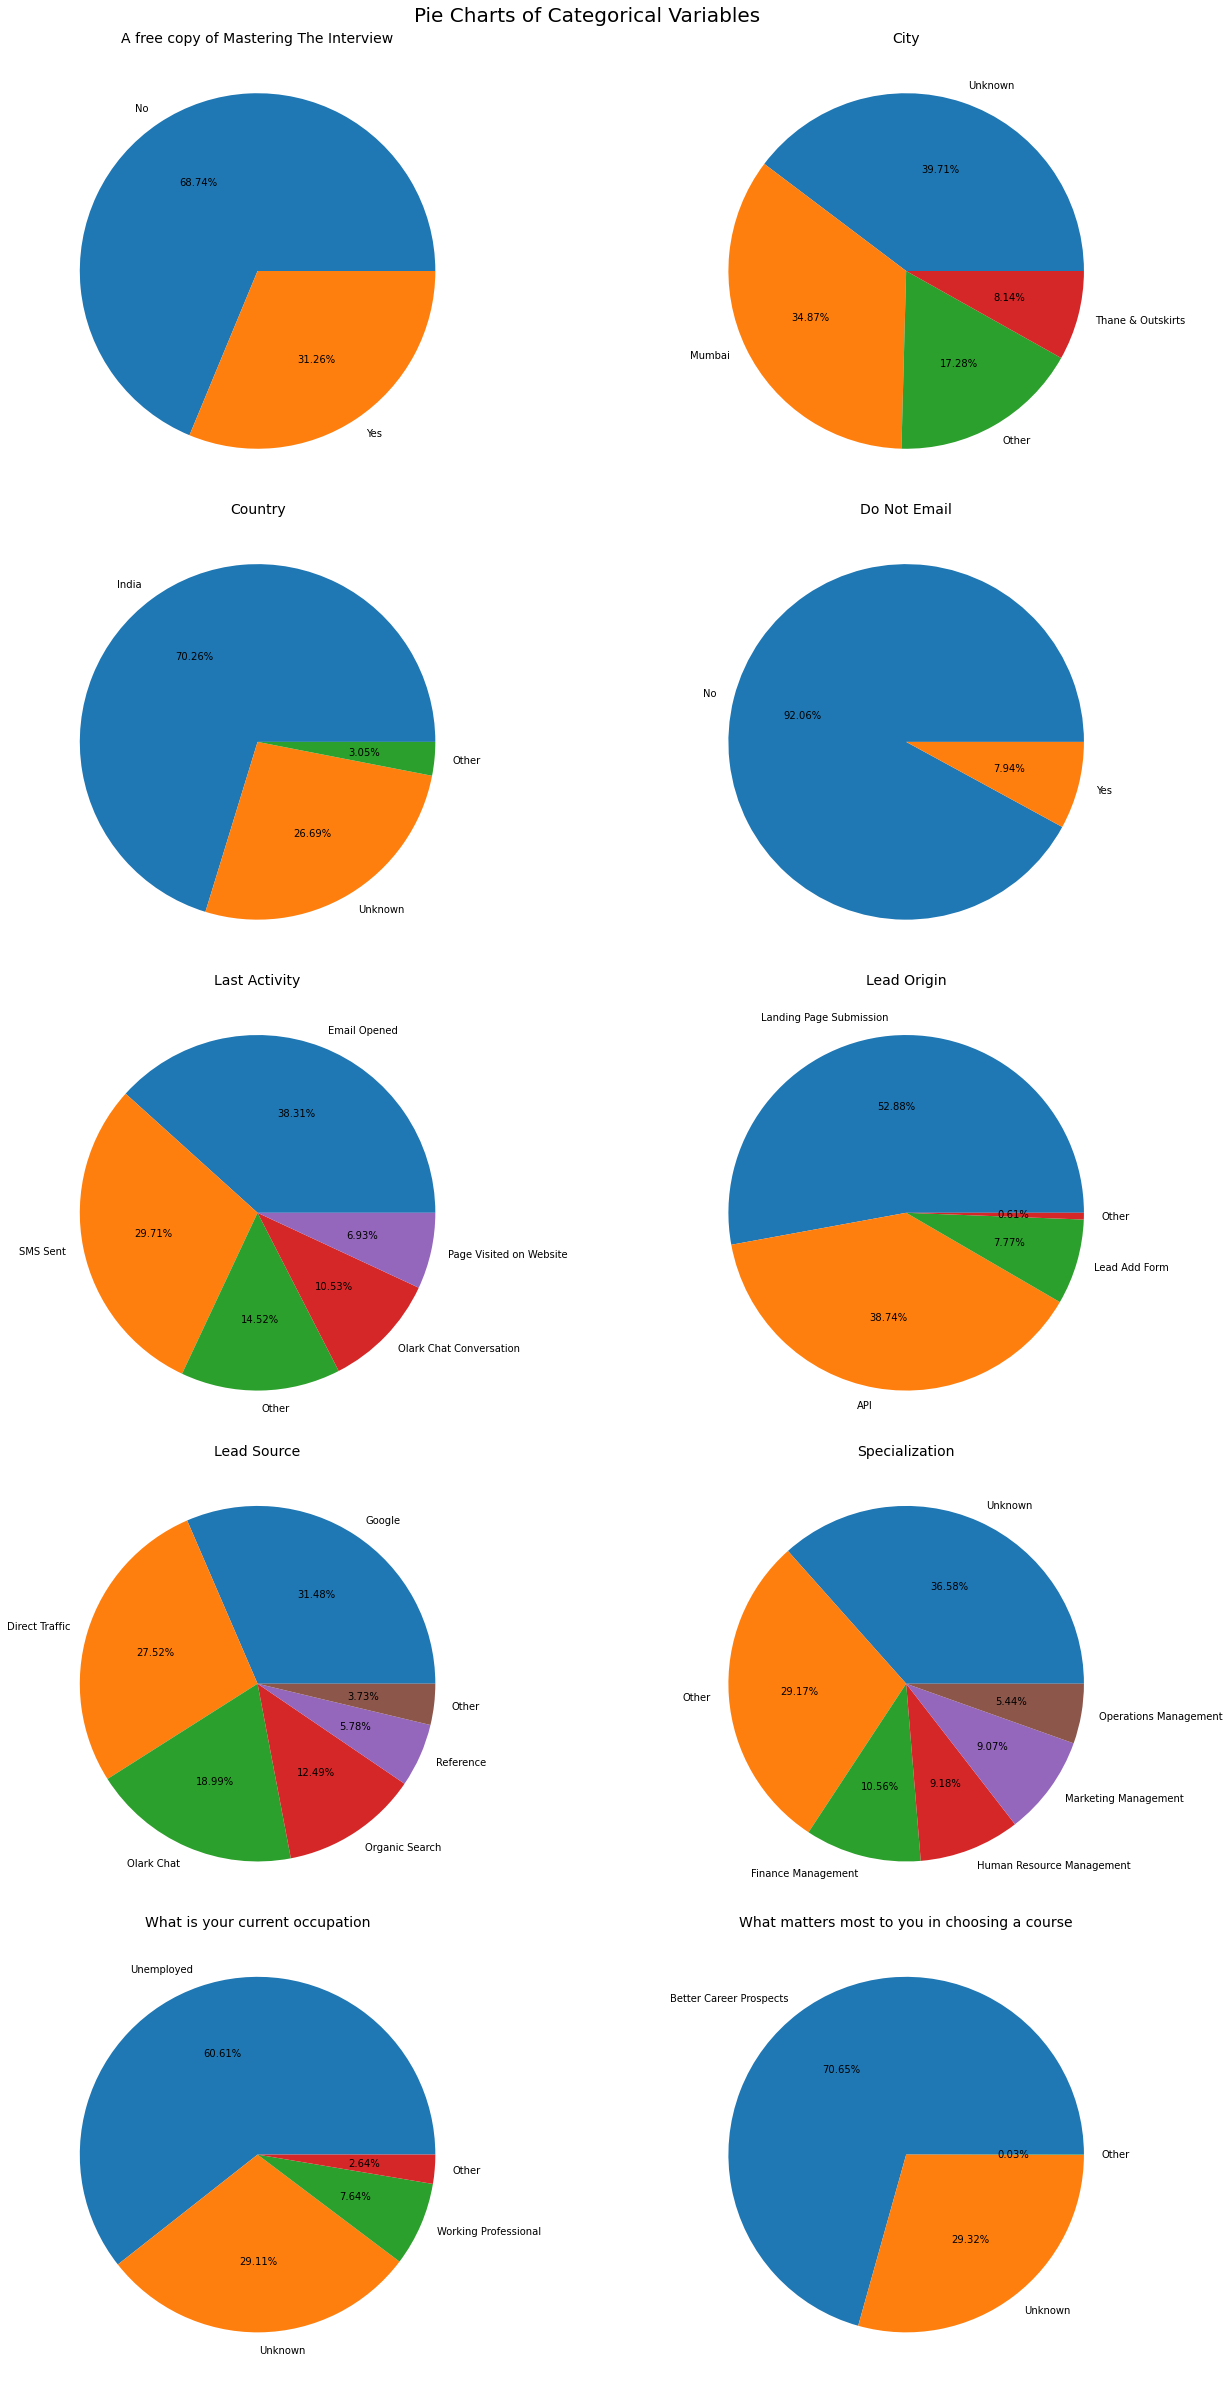

In [36]:
# Creating pie charts of categorical variables
cat_vars = list(df.columns.difference(df.describe().columns))

fig,axs = plt.subplots(5,2,figsize=[18,33],constrained_layout=True)
fig.suptitle('Pie Charts of Categorical Variables',fontsize=20)
for i,x in enumerate(cat_vars):
    t = df[x].value_counts(normalize=True)*100
    axs[i//2,i%2].pie(t.values,labels=t.index,autopct=lambda x: str(round(x,2))+'%')
    axs[i//2,i%2].set_title(x,fontsize=14)
fig.show()

**Insights**
1. Over 2/3rd of people did not want a free copy of 'Mastering the Interview' while the remaining wanted it.
2. The city of the majority of leads was 'Unknown' with 39.71% followed by Mumbai with 34.87%.
3. Over 2/3rd of leads were from India and slightly more than a quarter had an unknown country.
4. The vast majority (92.06%) of leads did not want emails.
5. The most common last activity was'Email Opened' (38.31%) followed by 'SMS Sent'(29.71%).
6. Slightly more than half of leads originated from landing page submissions and about 38.74% originated via APIs.
7. The 'Lead Source' of the majority of leads was 'Google', followed by 'Direct Traffic' and 'Olark Chat'.
8. 'Unknown' (36.58%) was the most common 'Specialization', followed by 'Other' (29.17%) and 'Finance Management' (10.56%).
9. About 60.61% of leads were unemployed, whereas the occupation of 29.11% was unknown.
10. The majority of leads (70.65%) were looking for 'Better Career Prospects'.

#### 3.3.3 Bivariate analysis of numerical variables

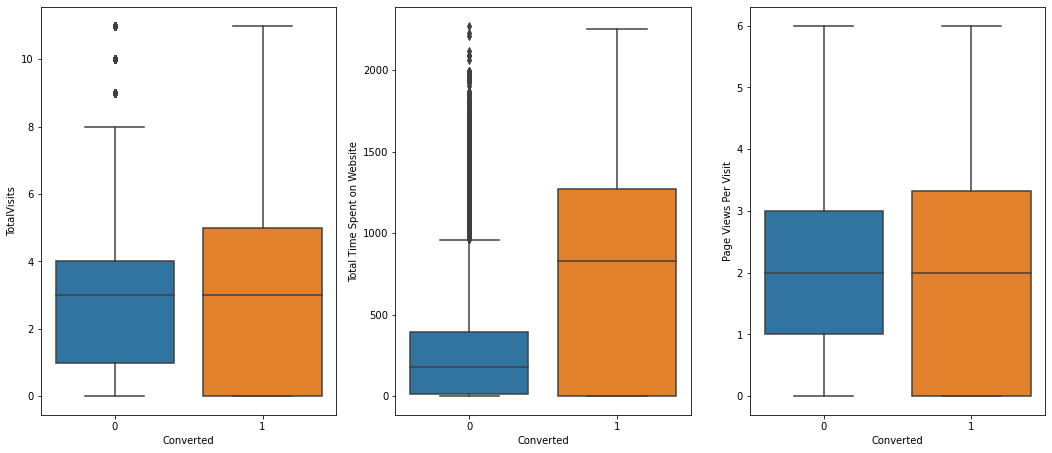

In [37]:
# Creating box plots of numerical variables
fig, ax = plt.subplots(1,3,figsize=[18,7.5])
for i,y in enumerate(num_vars):
    sns.boxplot(x=df['Converted'],y=df[y],ax=ax[i])
fig.show()

**Insights**
1. In general, leads that did not convert had fewer 'TotalVisits' than those that converted.
2. In general, leads that did not convert spent less time on the website than those who converted.
3. Somewhat counterintuitively, there was no major difference in the 'Pages Views Per Visit' of those who converted and those who did not convert.

#### 3.3.4 Bivariate analysis of categorical variables

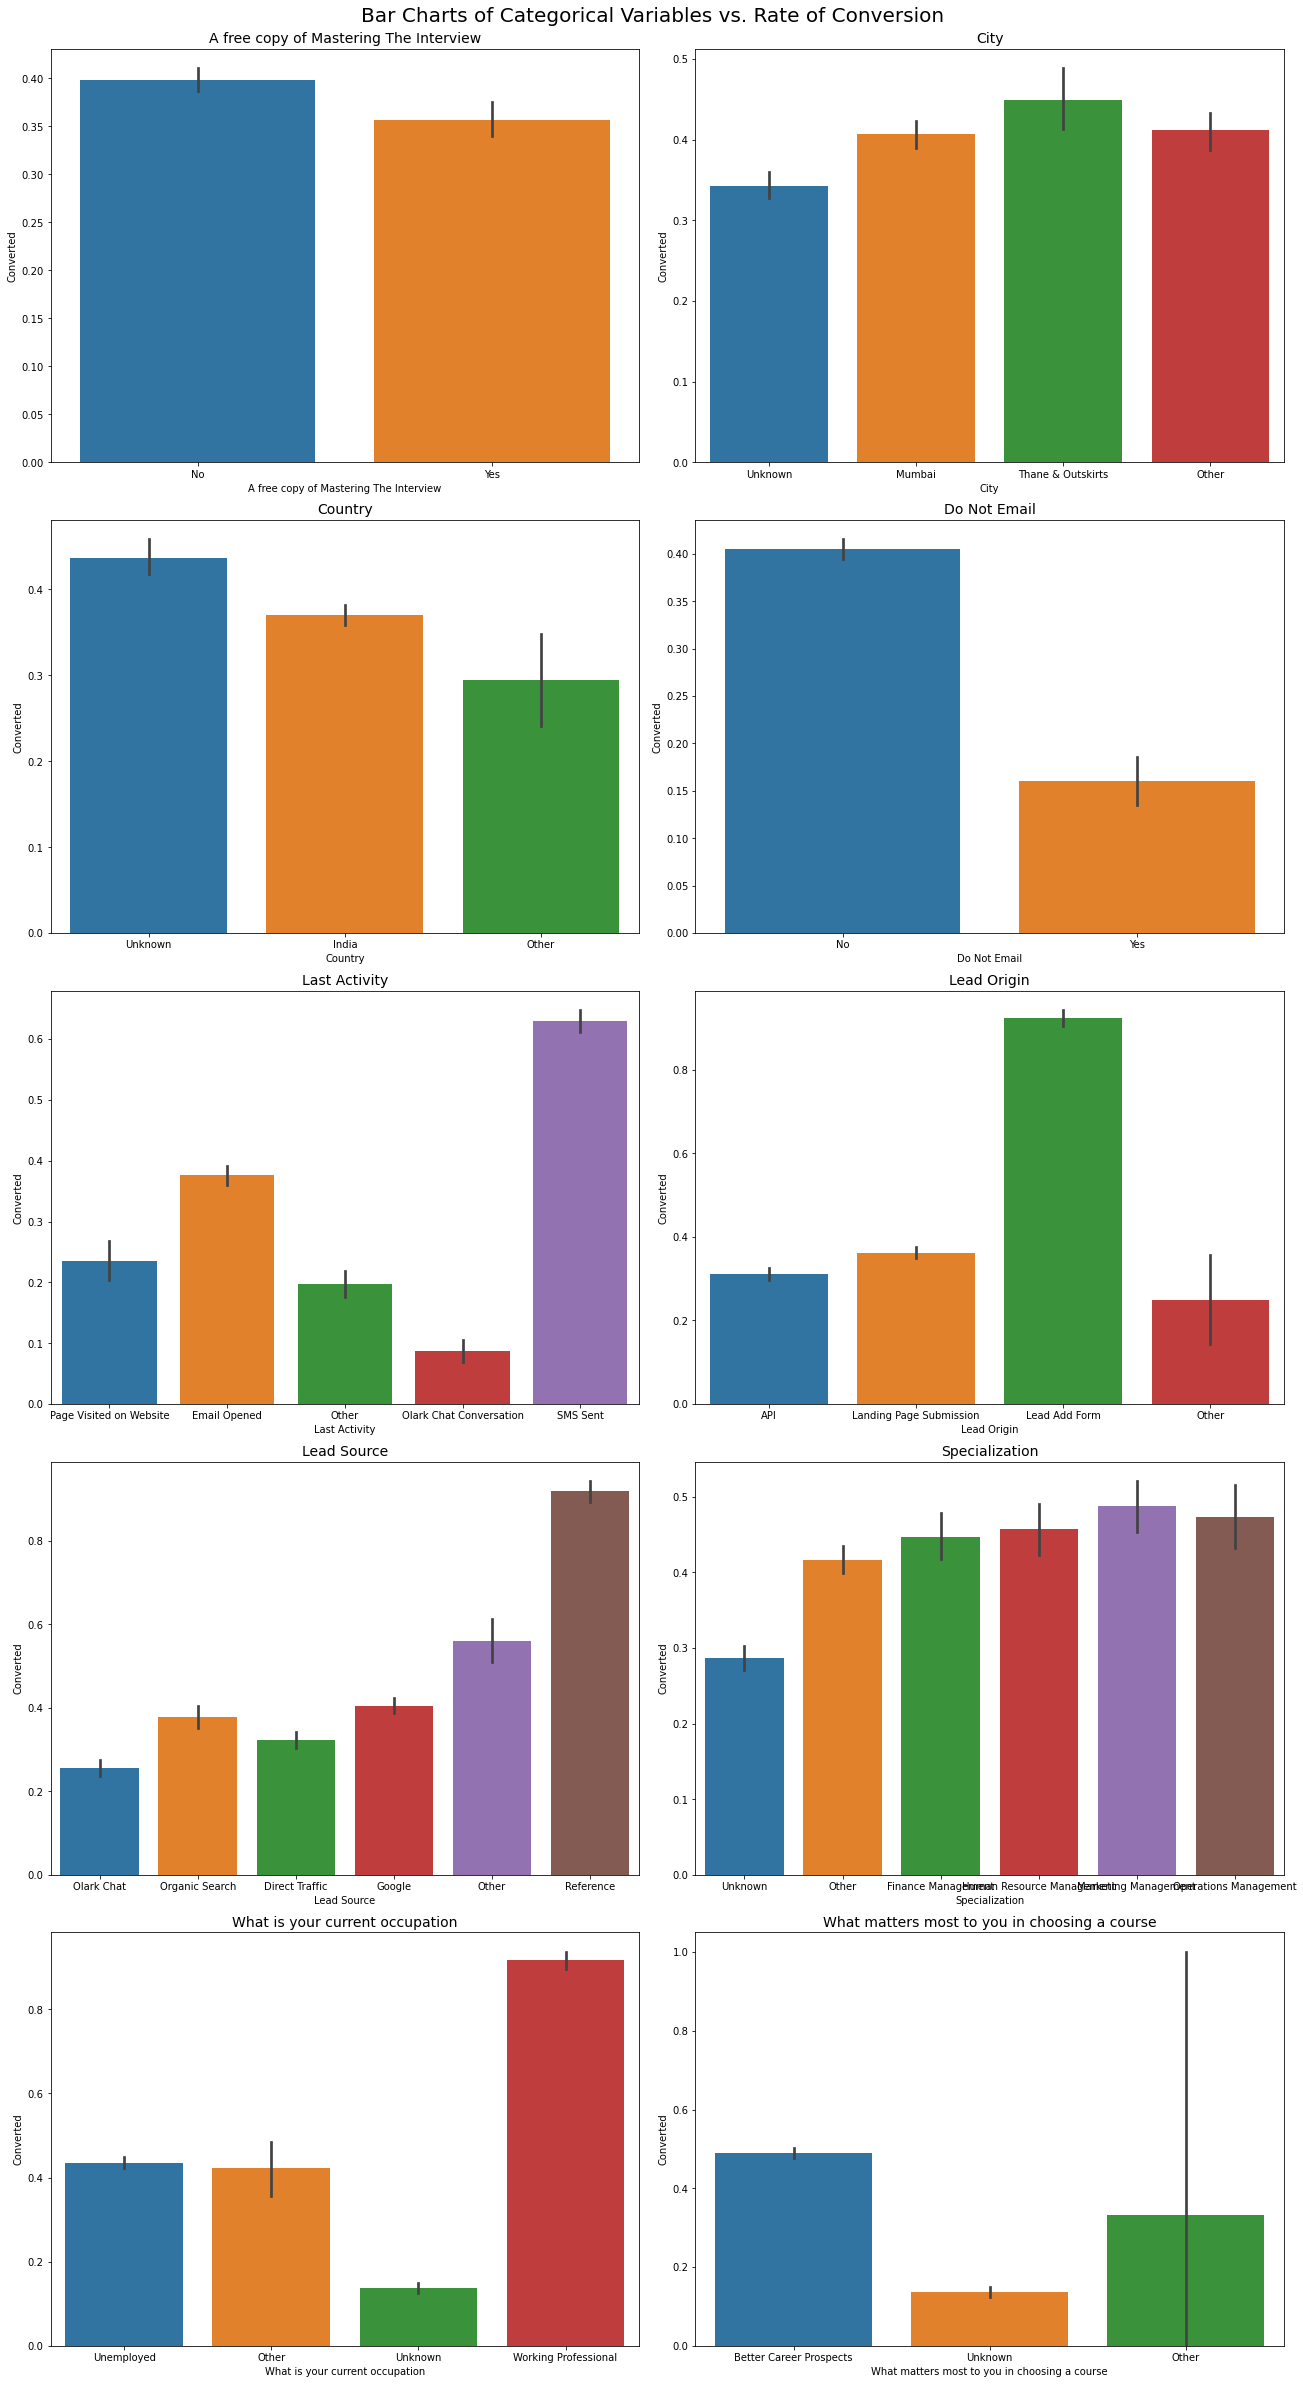

In [38]:
# Creating bar charts of categorical variables
fig,axs = plt.subplots(5,2,figsize=[18,33],constrained_layout=True)
fig.suptitle('Bar Charts of Categorical Variables vs. Rate of Conversion',fontsize=20)
for i,x in enumerate(cat_vars):
    sns.barplot(data=df,x=x,y='Converted',ax=axs[i//2,i%2])
    axs[i//2,i%2].set_title(x,fontsize=14)
fig.show()

**Insights**
1. 'A free copy of Mastering The Interview' - Leads that did not request a copy had a slightly higher conversion rate.
2. 'City' - Thane & Outskirts had the highest conversion rate, followed by Mumbai and Other.
3. 'Country' - Leads whose country was Unknown had the highest conversion rate followed by India.
4. 'Do Not Email' - Leads who wanted emails had a significantly higher conversion rate.
5. 'Last Activity' - Leads whose last activity was 'SMS Sent' had the highest conversion rate, followed by 'Email Opened' and 'Page Visited on Website'
6. 'Lead Origin' - Leads which originated from 'Lead Add Form' had the highest conversion rate by far.
7. 'Lead Source' - The lead source 'Reference' had the highest conversion rate, followed by 'Other'.
8. 'Specilization' - Most specializations had similar conversion rates, but that of 'Unknown' was much lower.
9. 'What is your current occupation' - Working professionals had the highest conversion rate by far and 'Unknown' had the lowest conversion rate.
10. 'What matters most to you in choosing a course' - Those looking for better career prospects had the highest conversion rate.

#### 3.3.5 Correlation matrix

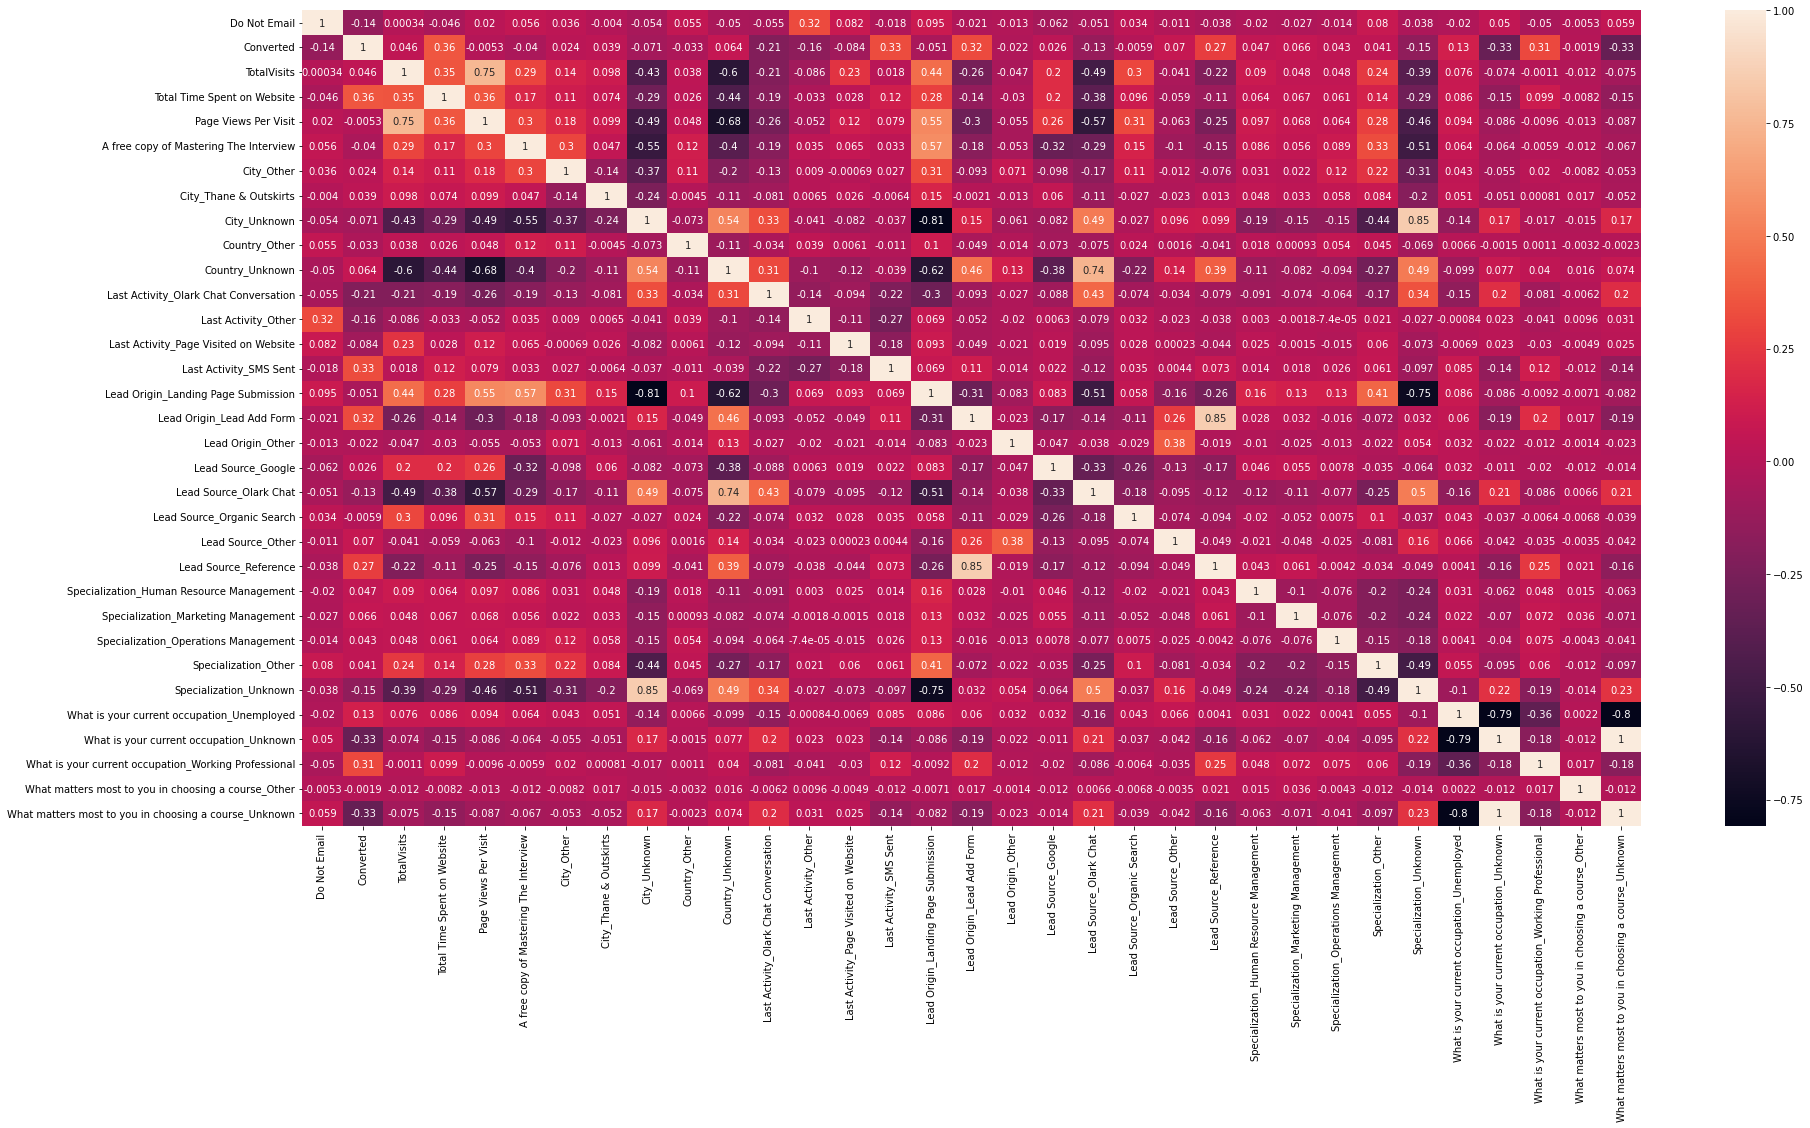

In [43]:
fig,ax = plt.subplots(figsize=[30,15])
sns.heatmap(df.corr(),annot=True,ax=ax)
fig.show()

There are some correlated variables and we will drop them during the model building process.

# 4 Data Preparation

### 4.1 Encoding categorical variables

In [39]:
# Identifying binary categorical variables to encode with 1/0
cat_vars = list(df.columns.difference(df.describe().columns))
for x in cat_vars:
    print(df[x].value_counts(),end='\n\n')

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

Unknown              3669
Mumbai               3222
Other                1597
Thane & Outskirts     752
Name: City, dtype: int64

India      6492
Unknown    2466
Other       282
Name: Country, dtype: int64

No     8506
Yes     734
Name: Do Not Email, dtype: int64

Email Opened               3540
SMS Sent                   2745
Other                      1342
Olark Chat Conversation     973
Page Visited on Website     640
Name: Last Activity, dtype: int64

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Other                        56
Name: Lead Origin, dtype: int64

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64

Unknown                      3380
Other                        2695
Finance Management            976
Human Resource Managem

In [40]:
# Encoding binary categorical variables identified above with 1/0
for x in ['A free copy of Mastering The Interview','Do Not Email']:
    df[x] = df[x].map({'Yes':1,'No':0})
    
for x in ['A free copy of Mastering The Interview','Do Not Email']:
    print(df[x].value_counts(),end='\n\n')

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

0    8506
1     734
Name: Do Not Email, dtype: int64



In [41]:
# Encoding other categorical variables using dummy variables
cat_vars.remove('A free copy of Mastering The Interview')
cat_vars.remove('Do Not Email')

In [42]:
dummies = pd.get_dummies(df[cat_vars],prefix=cat_vars,drop_first=True)
df = pd.concat([df,dummies],axis=1)
df = df.drop(columns=cat_vars)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other,City_Thane & Outskirts,City_Unknown,Country_Other,Country_Unknown,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Specialization_Unknown,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown
0,0,0,0.0,0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


### 4.2 Splitting the dataset into training and testing datasets

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(6468, 33)
(2772, 33)


### 4.3 Scaling numerical variables using standard scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [48]:
# Scaling the numerical variables in the training dataset
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,-1.798877e-17,-1.609377e-16,-9.142003e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.122305e+00,-8.853708e-01,-1.266675e+00
25%,-7.729250e-01,-8.634138e-01,-7.025878e-01
50%,-7.416494e-02,-4.352528e-01,-1.385005e-01
75%,6.245952e-01,8.098906e-01,4.255868e-01
max,2.720875e+00,3.271816e+00,2.117849e+00


In [49]:
# Scaling the numerical variables in the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2772.000000,2772.000000,2772.000000
mean,0.005996,0.023314,0.018003
std,0.997957,1.008922,1.012426
min,-1.122305,-0.885371,-1.266675
25%,-0.772925,-0.861584,-0.702588
50%,-0.074165,-0.413296,-0.138501
75%,0.624595,0.851060,0.707630
max,2.720875,3.237051,2.117849


## 5 Model Building

The model will be trained using recursive feature elimination followed by backward elimination.

In [50]:
# Importing libraries for training the model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Preparing response and predictor variables for training
y_train = df_train.pop('Converted')
X_train = df_train
X_train_sm = sm.add_constant(X_train)

In [52]:
# Defining a function to calculate variance inflation factor
def vif(X_train_sm):
    vif = [variance_inflation_factor(X_train_sm,i) for i in range(len(X_train_sm.columns))]
    VIF = pd.DataFrame({'Variable':X_train_sm.columns[:],'VIF':vif})
    print(VIF.sort_values(by='VIF',ascending=False))

### 5.1 Preliminary model with all predictor variables

In [53]:
logm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.9
Date:                Tue, 13 Sep 2022   Deviance:                       5161.9
Time:                        13:15:05   Pearson chi2:                 7.03e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.4974      0.297      1.672      0.095      -0.086       1.080
Do Not Email                                             -1.1051      0.179     -6.185      0.000      -1.455      -0.755
TotalVisits                                               0.3766      0.054      6.958      0.000       0.271       0.483
Total Time Spent on Website                               1.0696      0.041     26.381      0.000       0.990       1.149
Page Views Per Visit                                     -0.3419      0.061     -5.605      0.000      -0.461      -0.222
A free copy of Mastering The Interview                   -0.2701      0.110     -2.451      0.014      -0.486      -0.054
City_Other                                                0.0564      0.102      0.554      0.580      -0.143       0.256
City_Thane & Outskirts                                   -0.0290      0.134     -0.217      0.828      -0.291       0.233
City_Unknown                                             -0.6364      0.183     -3.479      0.001      -0.995      -0.278
Country_Other                                            -0.0869      0.211     -0.412      0.680      -0.500       0.326
Country_Unknown                                           1.1231      0.257      4.378      0.000       0.620       1.626
Last Activity_Olark Chat Conversation                    -1.3736      0.174     -7.897      0.000      -1.715      -1.033
Last Activity_Other                                      -0.5819      0.126     -4.602      0.000      -0.830      -0.334
Last Activity_Page Visited on Website                    -0.6718      0.157     -4.286      0.000      -0.979      -0.365
Last Activity_SMS Sent                                    1.2136      0.082     14.846      0.000       1.053       1.374
Lead Origin_Landing Page Submission                      -1.1259      0.155     -7.243      0.000      -1.431      -0.821
Lead Origin_Lead Add Form                                 2.6992      0.481      5.609      0.000       1.756       3.642
Lead Origin_Other                                        -2.4979      0.632     -3.953      0.000      -3.736      -1.260
Lead Source_Google                                        0.1782      0.116      1.537      0.124      -0.049       0.405
Lead Source_Olark Chat                                    0.2515      0.270      0.933      0.351      -0.277       0.780
Lead Source_Organic Search                                0.1199      0.131      0.913      0.361      -0.138       0.377
Lead Source_Other                                         0.4508      0.279      1.616      0.106      -0.096       0.998
Lead Source_Reference            

In [54]:
# Checking the number of variables with p-values greater than 0.05
len(logm.pvalues[logm.pvalues>0.05])

17

We will use recursive feature elimination to select 20 predictor variables

### 5.2 Recursive Feature Elimination

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [56]:
# Training the model on the dataset
logm = LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression()

In [57]:
# Performing RFE with 20 output variables
rfe = RFE(logm,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('City_Other', False, 12),
 ('City_Thane & Outskirts', False, 13),
 ('City_Unknown', True, 1),
 ('Country_Other', False, 11),
 ('Country_Unknown', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Other', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Human Resource Management', False, 7),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Operations Management', False, 5),

In [58]:
# Choosing variables selected by RFE
X_train = X_train[X_train.columns[rfe.support_]]
X_train.shape

(6468, 20)

In [59]:
X_train_sm = sm.add_constant(X_train)

### 5.3 Model 1 with top 20 predictors

In [60]:
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.5
Date:                Tue, 13 Sep 2022   Deviance:                       5170.9
Time:                        13:15:07   Pearson chi2:                 7.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4113
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.2884      0.141      2.051      0.040       0.013       0.564
Do Not Email                                             -1.1301      0.178     -6.336      0.000      -1.480      -0.781
TotalVisits                                               0.3841      0.053      7.188      0.000       0.279       0.489
Total Time Spent on Website                               1.0661      0.040     26.445      0.000       0.987       1.145
Page Views Per Visit                                     -0.3372      0.059     -5.685      0.000      -0.453      -0.221
A free copy of Mastering The Interview                   -0.3587      0.090     -4.000      0.000      -0.534      -0.183
City_Unknown                                             -0.6920      0.174     -3.977      0.000      -1.033      -0.351
Country_Unknown                                           1.2089      0.140      8.665      0.000       0.935       1.482
Last Activity_Olark Chat Conversation                    -1.3593      0.173     -7.845      0.000      -1.699      -1.020
Last Activity_Other                                      -0.5816      0.126     -4.620      0.000      -0.828      -0.335
Last Activity_Page Visited on Website                    -0.6756      0.156     -4.319      0.000      -0.982      -0.369
Last Activity_SMS Sent                                    1.2044      0.081     14.834      0.000       1.045       1.364
Lead Origin_Landing Page Submission                      -1.2024      0.142     -8.449      0.000      -1.481      -0.924
Lead Origin_Lead Add Form                                 2.8277      0.377      7.505      0.000       2.089       3.566
Lead Origin_Other                                        -2.3290      0.523     -4.453      0.000      -3.354      -1.304
Lead Source_Reference                                    -1.2592      0.417     -3.020      0.003      -2.076      -0.442
Specialization_Unknown                                   -0.7417      0.163     -4.554      0.000      -1.061      -0.422
What is your current occupation_Unknown                  19.3409   1.18e+04      0.002      0.999   -2.32e+04    2.32e+04
What is your current occupation_Working Professional      2.4723      0.193     12.823      0.000       2.094       2.850
What matters most to you in choosing a course_Other      -2.9146      2.392     -1.219      0.223      -7.603       1.773
What matters most to you in choosing a course_Unknown   -20.4270   1.18e+04     -0.002      0.999   -2.32e+04    2.32e+04
=========================================================================================================================
"""

In [61]:
vif(X_train_sm)

                                             Variable         VIF
20  What matters most to you in choosing a course_...  109.765923
17            What is your current occupation_Unknown  109.450120
0                                               const   17.119521
6                                        City_Unknown    5.568800
16                             Specialization_Unknown    4.962255
13                          Lead Origin_Lead Add Form    4.440674
12                Lead Origin_Landing Page Submission    4.281961
15                              Lead Source_Reference    4.197044
7                                     Country_Unknown    3.033603
4                                Page Views Per Visit    3.033508
2                                         TotalVisits    2.539560
5              A free copy of Mastering The Interview    1.559128
9                                 Last Activity_Other    1.406809
8               Last Activity_Olark Chat Conversation    1.396138
11        

### 5.4 Model 2 after removing 'What is your current occupation_Unknown', which has the largest p-value

In [62]:
X_train_sm = X_train_sm.drop(columns='What is your current occupation_Unknown')
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.1
Date:                Tue, 13 Sep 2022   Deviance:                       5172.2
Time:                        13:15:07   Pearson chi2:                 7.05e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4112
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.2920      0.141      2.077      0.038       0.016       0.568
Do Not Email                                             -1.1357      0.178     -6.376      0.000      -1.485      -0.787
TotalVisits                                               0.3845      0.053      7.194      0.000       0.280       0.489
Total Time Spent on Website                               1.0667      0.040     26.460      0.000       0.988       1.146
Page Views Per Visit                                     -0.3368      0.059     -5.678      0.000      -0.453      -0.221
A free copy of Mastering The Interview                   -0.3566      0.090     -3.978      0.000      -0.532      -0.181
City_Unknown                                             -0.6810      0.174     -3.924      0.000      -1.021      -0.341
Country_Unknown                                           1.2117      0.140      8.684      0.000       0.938       1.485
Last Activity_Olark Chat Conversation                    -1.3597      0.173     -7.845      0.000      -1.699      -1.020
Last Activity_Other                                      -0.5847      0.126     -4.648      0.000      -0.831      -0.338
Last Activity_Page Visited on Website                    -0.6782      0.156     -4.336      0.000      -0.985      -0.372
Last Activity_SMS Sent                                    1.2044      0.081     14.833      0.000       1.045       1.364
Lead Origin_Landing Page Submission                      -1.2072      0.142     -8.487      0.000      -1.486      -0.928
Lead Origin_Lead Add Form                                 2.8287      0.377      7.506      0.000       2.090       3.567
Lead Origin_Other                                        -2.3244      0.523     -4.443      0.000      -3.350      -1.299
Lead Source_Reference                                    -1.2634      0.417     -3.030      0.002      -2.081      -0.446
Specialization_Unknown                                   -0.7567      0.162     -4.675      0.000      -1.074      -0.439
What is your current occupation_Working Professional      2.4620      0.192     12.854      0.000       2.087       2.837
What matters most to you in choosing a course_Other      -2.9130      2.386     -1.221      0.222      -7.590       1.764
What matters most to you in choosing a course_Unknown    -1.0896      0.088    -12.419      0.000      -1.262      -0.918
=========================================================================================================================
"""

In [63]:
vif(X_train_sm)

                                             Variable        VIF
0                                               const  17.079875
6                                        City_Unknown   5.476707
16                             Specialization_Unknown   4.805562
13                          Lead Origin_Lead Add Form   4.440618
12                Lead Origin_Landing Page Submission   4.262423
15                              Lead Source_Reference   4.193456
4                                Page Views Per Visit   3.030830
7                                     Country_Unknown   3.030279
2                                         TotalVisits   2.539558
5              A free copy of Mastering The Interview   1.553270
9                                 Last Activity_Other   1.404710
8               Last Activity_Olark Chat Conversation   1.396058
11                             Last Activity_SMS Sent   1.318782
3                         Total Time Spent on Website   1.303333
17  What is your current 

### 5.5 Model 3 after removing 'What matters most to you in choosing a course_Other', which has the largest p-value

In [64]:
X_train_sm = X_train_sm.drop(columns='What matters most to you in choosing a course_Other')
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.1
Date:                Tue, 13 Sep 2022   Deviance:                       5174.1
Time:                        13:15:08   Pearson chi2:                 7.19e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.2821      0.140      2.011      0.044       0.007       0.557
Do Not Email                                             -1.1347      0.178     -6.373      0.000      -1.484      -0.786
TotalVisits                                               0.3848      0.053      7.200      0.000       0.280       0.490
Total Time Spent on Website                               1.0667      0.040     26.465      0.000       0.988       1.146
Page Views Per Visit                                     -0.3364      0.059     -5.673      0.000      -0.453      -0.220
A free copy of Mastering The Interview                   -0.3546      0.090     -3.956      0.000      -0.530      -0.179
City_Unknown                                             -0.6734      0.173     -3.884      0.000      -1.013      -0.334
Country_Unknown                                           1.2068      0.139      8.655      0.000       0.933       1.480
Last Activity_Olark Chat Conversation                    -1.3566      0.173     -7.830      0.000      -1.696      -1.017
Last Activity_Other                                      -0.5848      0.126     -4.651      0.000      -0.831      -0.338
Last Activity_Page Visited on Website                    -0.6772      0.156     -4.331      0.000      -0.984      -0.371
Last Activity_SMS Sent                                    1.2052      0.081     14.845      0.000       1.046       1.364
Lead Origin_Landing Page Submission                      -1.1998      0.142     -8.450      0.000      -1.478      -0.921
Lead Origin_Lead Add Form                                 2.8326      0.377      7.517      0.000       2.094       3.571
Lead Origin_Other                                        -2.3122      0.523     -4.422      0.000      -3.337      -1.287
Lead Source_Reference                                    -1.2625      0.417     -3.028      0.002      -2.080      -0.445
Specialization_Unknown                                   -0.7525      0.162     -4.651      0.000      -1.070      -0.435
What is your current occupation_Working Professional      2.4604      0.191     12.850      0.000       2.085       2.836
What matters most to you in choosing a course_Unknown    -1.0889      0.088    -12.411      0.000      -1.261      -0.917
=========================================================================================================================
"""

In [65]:
# Calculating variance inflation factor
vif(X_train_sm)

                                             Variable        VIF
0                                               const  17.055824
6                                        City_Unknown   5.470630
16                             Specialization_Unknown   4.805496
13                          Lead Origin_Lead Add Form   4.440381
12                Lead Origin_Landing Page Submission   4.260168
15                              Lead Source_Reference   4.193326
4                                Page Views Per Visit   3.030821
7                                     Country_Unknown   3.029612
2                                         TotalVisits   2.539537
5              A free copy of Mastering The Interview   1.552683
9                                 Last Activity_Other   1.404580
8               Last Activity_Olark Chat Conversation   1.395963
11                             Last Activity_SMS Sent   1.318603
3                         Total Time Spent on Website   1.303271
17  What is your current 

### 5.6 Model 4 after removing 'const', which has the highest VIF

In [66]:
X_train_sm = X_train_sm.drop(columns='const')
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.1
Date:                Tue, 13 Sep 2022   Deviance:                       5178.2
Time:                        13:15:08   Pearson chi2:                 7.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4107
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Do Not Email                                             -1.1419      0.178     -6.428      0.000      -1.490      -0.794
TotalVisits                                               0.3947      0.053      7.423      0.000       0.290       0.499
Total Time Spent on Website                               1.0746      0.040     26.791      0.000       0.996       1.153
Page Views Per Visit                                     -0.3346      0.059     -5.643      0.000      -0.451      -0.218
A free copy of Mastering The Interview                   -0.3205      0.088     -3.638      0.000      -0.493      -0.148
City_Unknown                                             -0.5299      0.157     -3.367      0.001      -0.838      -0.221
Country_Unknown                                           1.2749      0.135      9.424      0.000       1.010       1.540
Last Activity_Olark Chat Conversation                    -1.3162      0.171     -7.685      0.000      -1.652      -0.981
Last Activity_Other                                      -0.5391      0.124     -4.360      0.000      -0.781      -0.297
Last Activity_Page Visited on Website                    -0.6417      0.155     -4.136      0.000      -0.946      -0.338
Last Activity_SMS Sent                                    1.2319      0.080     15.378      0.000       1.075       1.389
Lead Origin_Landing Page Submission                      -0.9710      0.084    -11.492      0.000      -1.137      -0.805
Lead Origin_Lead Add Form                                 2.8354      0.376      7.542      0.000       2.099       3.572
Lead Origin_Other                                        -2.1576      0.517     -4.170      0.000      -3.172      -1.144
Lead Source_Reference                                    -1.1741      0.414     -2.837      0.005      -1.985      -0.363
Specialization_Unknown                                   -0.6685      0.156     -4.285      0.000      -0.974      -0.363
What is your current occupation_Working Professional      2.4887      0.191     13.057      0.000       2.115       2.862
What matters most to you in choosing a course_Unknown    -1.0772      0.088    -12.298      0.000      -1.249      -0.906
=========================================================================================================================
"""

In [67]:
vif(X_train_sm)

                                             Variable       VIF
5                                        City_Unknown  7.622007
15                             Specialization_Unknown  6.967949
12                          Lead Origin_Lead Add Form  4.809127
14                              Lead Source_Reference  4.390946
6                                     Country_Unknown  3.913172
11                Lead Origin_Landing Page Submission  3.437821
3                                Page Views Per Visit  3.029205
1                                         TotalVisits  2.520905
4              A free copy of Mastering The Interview  2.165725
10                             Last Activity_SMS Sent  1.829598
17  What matters most to you in choosing a course_...  1.637107
8                                 Last Activity_Other  1.585225
7               Last Activity_Olark Chat Conversation  1.533331
16  What is your current occupation_Working Profes...  1.289004
2                         Total Time Spe

### 5.7 Model 5 after removing 'City_Unknown', which has the highest VIF

In [68]:
X_train_sm = X_train_sm.drop(columns='City_Unknown')
logm5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.7
Date:                Tue, 13 Sep 2022   Deviance:                       5189.4
Time:                        13:15:08   Pearson chi2:                 7.31e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4096
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Do Not Email                                             -1.1389      0.177     -6.420      0.000      -1.487      -0.791
TotalVisits                                               0.3952      0.053      7.444      0.000       0.291       0.499
Total Time Spent on Website                               1.0683      0.040     26.712      0.000       0.990       1.147
Page Views Per Visit                                     -0.3412      0.059     -5.765      0.000      -0.457      -0.225
A free copy of Mastering The Interview                   -0.3120      0.088     -3.550      0.000      -0.484      -0.140
Country_Unknown                                           1.1918      0.133      8.986      0.000       0.932       1.452
Last Activity_Olark Chat Conversation                    -1.3666      0.171     -7.990      0.000      -1.702      -1.031
Last Activity_Other                                      -0.5887      0.123     -4.803      0.000      -0.829      -0.348
Last Activity_Page Visited on Website                    -0.6815      0.155     -4.409      0.000      -0.984      -0.379
Last Activity_SMS Sent                                    1.1860      0.079     15.054      0.000       1.032       1.340
Lead Origin_Landing Page Submission                      -0.9398      0.084    -11.221      0.000      -1.104      -0.776
Lead Origin_Lead Add Form                                 2.8560      0.376      7.596      0.000       2.119       3.593
Lead Origin_Other                                        -1.8062      0.511     -3.535      0.000      -2.808      -0.805
Lead Source_Reference                                    -1.1954      0.414     -2.888      0.004      -2.007      -0.384
Specialization_Unknown                                   -1.0993      0.091    -12.089      0.000      -1.277      -0.921
What is your current occupation_Working Professional      2.4386      0.192     12.721      0.000       2.063       2.814
What matters most to you in choosing a course_Unknown    -1.0888      0.087    -12.458      0.000      -1.260      -0.918
=========================================================================================================================
"""

In [69]:
vif(X_train_sm)

                                             Variable       VIF
11                          Lead Origin_Lead Add Form  4.806665
13                              Lead Source_Reference  4.365382
5                                     Country_Unknown  3.805032
10                Lead Origin_Landing Page Submission  3.363684
3                                Page Views Per Visit  3.025949
14                             Specialization_Unknown  2.539772
1                                         TotalVisits  2.520625
4              A free copy of Mastering The Interview  2.163934
9                              Last Activity_SMS Sent  1.753211
16  What matters most to you in choosing a course_...  1.627719
7                                 Last Activity_Other  1.558300
6               Last Activity_Olark Chat Conversation  1.521328
2                         Total Time Spent on Website  1.284981
0                                        Do Not Email  1.267807
8               Last Activity_Page Visit

We will finalise model 5 because all p-values are smaller than 0.05 and VIFs are less than 5.

### 5.8 ROC Curve

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

In [71]:
# Deriving predicted probabilities based on model 5
y_train_pred_probs = logm5.predict(X_train_sm)

In [72]:
# Calculating fpr, tpr and auc_score
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred_probs,pos_label=1)
auc_score = roc_auc_score(y_train,y_train_pred_probs)

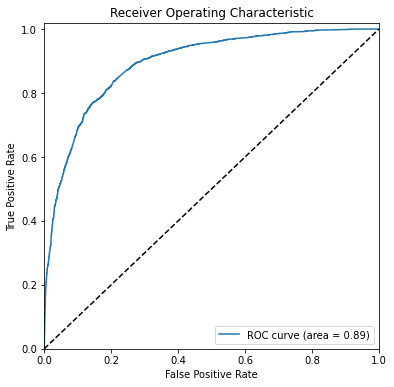

In [73]:
# Plotting the ROC curve
fig, ax = plt.subplots(figsize=[6,6])
ax.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
ax.plot([0,1],[0,1],'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.02])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
fig.show()

Thus, the area under the ROC curve is **0.89**, which indicates a good model.

### 5.9 Optimal Probability Threshold

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
# Calculating accuracy, sensitivity, specificity, precision and recall for different thresholds
thresholds = np.arange(0,1,0.1)
accuracy = np.array([])
sensitivity = np.array([])
specificity = np.array([])
precision = np.array([])

for t in thresholds:
    y_train_pred = logm5.predict(X_train_sm).map(lambda x: 1 if x>t else 0)
    cm = confusion_matrix(y_train,y_train_pred)
    accuracy = np.append(accuracy,(cm[0,0]+cm[1,1])/np.sum(cm))
    sensitivity = np.append(sensitivity,cm[1,1]/np.sum(cm[1,]))
    specificity = np.append(specificity,cm[0,0]/np.sum(cm[0,]))
    precision = np.append(precision,cm[1,1]/(cm[0,1]+cm[1,1]))
    
thresholds_df = pd.DataFrame({'Threshold':thresholds,'Accuracy':accuracy,'Sensitivity':sensitivity,'Specificity':specificity,'Precision':precision,'Recall':sensitivity})
thresholds_df

,Threshold,Accuracy,Sensitivity,Specificity,Precision,Recall
0,0.0,0.381262,1.000000,0.000000,0.381262,1.000000
1,0.1,0.636982,0.969181,0.432284,0.512656,0.969181
2,0.2,0.762832,0.917680,0.667416,0.629661,0.917680
3,0.3,0.806432,0.844688,0.782859,0.705623,0.844688
4,0.4,0.818955,0.776156,0.845327,0.755626,0.776156
5,0.5,0.819882,0.713706,0.885307,0.793150,0.713706
6,0.6,0.804886,0.613544,0.922789,0.830406,0.613544
7,0.7,0.787260,0.525547,0.948526,0.862850,0.525547
8,0.8,0.769017,0.444850,0.968766,0.897709,0.444850
9,0.9,0.711967,0.261963,0.989255,0.937591,0.261963


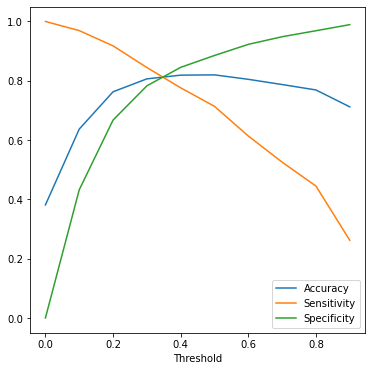

In [76]:
# Plotting the accuracy, sensitivity and specificity
fig,ax = plt.subplots(figsize=[6,6])
thresholds_df.plot('Threshold',['Accuracy','Sensitivity','Specificity'],ax=ax)
fig.show()

Thus, the optimal probability threshold according to the sensitivity-specificity view is about 0.35.

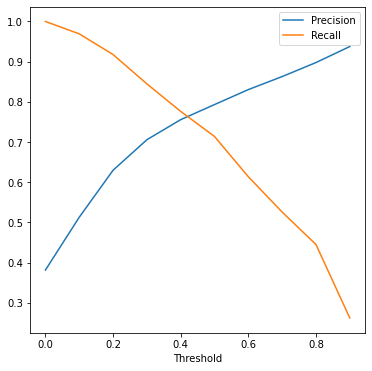

In [77]:
# Plotting the precision and recall
fig,ax = plt.subplots(figsize=[6,6])
thresholds_df.plot('Threshold',['Precision','Recall'],ax=ax)
fig.show()

Thus, the optimal probability threshold according to the precision-recall view is about 0.4. We will go with the threshold of **0.4** because it yields a precision close to 80%, which corresponds to the ballpark target conversion rate of 80% given by the CEO.

## 6 Model Evaluation

### 6.1 Model metrics on the training dataset

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [79]:
# Deriving predicted y-values based on model 5
y_train_pred_probs = logm5.predict(X_train_sm)
y_train_pred = y_train_pred_probs.map(lambda x: 1 if x > 0.4 else 0)

In [80]:
# Drawing the confusion matrix and calculating metrics
cm1 = confusion_matrix(y_train,y_train_pred)
cm1

array([[3383,  619],
       [ 552, 1914]])

In [81]:
# Accuracy
accuracy_score(y_train,y_train_pred)

0.8189548546691404

In [82]:
# Sensitivity
cm1[1,1]/np.sum(cm1[1,])

0.7761557177615572

In [83]:
# Specificity
cm1[0,0]/np.sum(cm1[0,])

0.8453273363318341

In [84]:
# Precision
precision_score(y_train,y_train_pred)

0.7556257402289775

In [85]:
# Recall
recall_score(y_train,y_train_pred)

0.7761557177615572

### 6.2 Model metrics on the test dataset

In [86]:
# Preparing response and predictor variables for testing
y_test = df_test.pop('Converted')
X_test = df_test[X_train_sm.columns]

# There's no need to add a constant to X_test becase the final model doesn't have a constant

In [87]:
# Making predictions on the test set based on model 5
y_test_pred_probs = logm5.predict(X_test)
y_test_pred = y_test_pred_probs.map(lambda x: 1 if x > 0.4 else 0)

In [88]:
# Drawing the confusion matrix and calculating metrics
cm2 = confusion_matrix(y_test,y_test_pred)
cm2

array([[1426,  251],
       [ 251,  844]])

In [89]:
# Accuracy
accuracy_score(y_test,y_test_pred)

0.8189033189033189

In [90]:
# Sensitivity
cm2[1,1]/np.sum(cm2[1,])

0.7707762557077625

In [91]:
# Specificity
cm2[0,0]/np.sum(cm2[0,])

0.8503279666070364

In [92]:
# Precision
precision_score(y_test,y_test_pred)

0.7707762557077625

In [93]:
# Recall
recall_score(y_test,y_test_pred)

0.7707762557077625

## 7 Model Interpretation and Lead Score Assignment

### 7.1 Equation of logistic regression with standardised variables

logit(p) = -1.1389\*Do Not Email + 0.3952\*TotalVisits + 1.0683\*Total Time Spent on Website - 0.3412\*Page Views Per Visit - 0.3120\*A free copy of Mastering The Interview + 1.1918\*Country_Unknown - 1.3666 * Last Activity_Olark Chat Conversation - 0.5887\*Last Activity_Other - 0.6815\*Last Activity_Page Visited on Website + 1.1860\*Last Activity_SMS Sent - 0.9398\*Lead Origin_Landing Page Submission + 2.8560\*Lead Origin_Lead Add Form - 1.8062\*Lead Origin_Other - 1.1954\*Lead Source_Reference - 1.0993\*Specialization_Unknown + 2.4386\*What is your current occupation_Working Professional - 1.0888\*What matters most to you in choosing a course_Unknown

### 7.2 Interpretation of results

In [94]:
# Sorting predictor variables in the descending order of the absolute value of their model coefficients
sorted(logm5.params.index,key=lambda x: abs(logm5.params[x]),reverse=True)

['Lead Origin_Lead Add Form',
 'What is your current occupation_Working Professional',
 'Lead Origin_Other',
 'Last Activity_Olark Chat Conversation',
 'Lead Source_Reference',
 'Country_Unknown',
 'Last Activity_SMS Sent',
 'Do Not Email',
 'Specialization_Unknown',
 'What matters most to you in choosing a course_Unknown',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Last Activity_Page Visited on Website',
 'Last Activity_Other',
 'TotalVisits',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']

As per the final model, the top 3 variables that predict whether a lead will convert are as follows:
1. Lead Origin_Lead Add Form - when 'Lead Origin_Lead Add Form' takes the value 1 (compared to the reference 0), log odds of conversion increases by 2.856
2. What is your current occupation_Working Professional - when 'What is your current occupation_Working Professional' takes the value 1 (compared to the reference 0), log odds of conversion increases by 2.4386
3. Lead Origin_Other - when 'Lead Origin_Other' takes the value 1 (compared to the reference 0), log odds of conversion decreases by 1.8062

### 7.3 Assignment of lead scores

In [95]:
# Creating a series of predicted probabilities for all leads
y_pred_probs = pd.concat([y_train_pred_probs,y_test_pred_probs])
y_pred_probs

1871    0.558378
6795    0.113042
3516    0.389773
8105    0.805573
3934    0.296362
          ...   
8649    0.133488
2152    0.959973
7101    0.296362
5331    0.105447
2960    0.878890
Length: 9240, dtype: float64

In [96]:
# Assigning lead scores to Prospect IDs
lead_scores = pd.concat([prospect_id,round(y_pred_probs*100),df['Converted']],axis=1)
lead_scores = lead_scores.rename(columns={0:'Lead Score'})
lead_scores.head(10)

,Prospect ID,Lead Score,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,18.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,37.0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,66.0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,13.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,33.0,1
5,2058ef08-2858-443e-a01f-a9237db2f5ce,3.0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,77.0,1
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,3.0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,4.0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,10.0,0


In [97]:
# Filtering hot leads
hot_leads = lead_scores[lead_scores['Lead Score']>40]
hot_leads.head(10)

,Prospect ID,Lead Score,Converted
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,66.0,1
6,9fae7df4-169d-489b-afe4-0f3d752542ed,77.0,1
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,59.0,1
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,58.0,1
12,8bf76a52-2478-476b-8618-1688e07874ad,92.0,1
18,82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c,73.0,1
24,ecd117ca-375f-49ea-afd6-b52b84d00c69,82.0,1
26,c494aca4-8c8e-4081-9784-41eb6346015e,48.0,1
27,6d143c0e-abae-425f-a2c0-52c2946cbd45,59.0,1
30,da8c5ce5-52b5-4a4e-bf75-e533d2aca52c,59.0,1


In [98]:
hot_leads.shape

(3603, 3)

## 8 Conclusion

Thus, the logistic regression model is built and lead scores are assigned to all of the leads. The model has identified 3603 hot leads from the total of 9240. The metrics of the model are as follows.

**Training Dataset**
- Accuracy = 0.82
- Sensitivity = 0.78
- Specificity = 0.84
- Precision = 0.76
- Recall = 0.78

**Test Dataset**
- Accuracy = 0.82
- Sensitivity = 0.77
- Specificity = 0.85
- Precision = 0.77
- Recall = 0.77

Similar metrics in the training and test datasets indicate that the model is robust.